In [1]:
import os
os.environ["CUVIS"] = "/usr/lib/cuvis/"
os.chdir("/mnt/ai_devel/cuvis.ai")
import numpy as np
import yaml
import matplotlib.pyplot as plt
import cuvis
from cuvis_ai.preprocessor import PCA, NMF
from cuvis_ai.pipeline import Graph
from cuvis_ai.unsupervised import KMeans
from cuvis_ai.deciders import MultiClassDecider
from cuvis_ai.distance import Euclidean, Manhattan, Canberra, SpectralAngle, GFC, ECS, Minkowski
import networkx as nx
%matplotlib inline

AttributeError: module 'cuvis_il' has no attribute 'CUVIS_MESU_FLAG_POOR_REFERENCE'

In [2]:
graph = Graph('tomato_net')

In [3]:
# Load a sample image
data = cuvis.SessionFile('/home/nathaniel/Downloads/20230809_140605_X20_28_b_000.cu3s').get_measurement(0)
sample_cube = data.data.get('cube').array
waves = data.data.get('cube').wavelength
use_spectra = np.array([sample_cube[175, 225,:], sample_cube[150,200,:], sample_cube[200,150,:]])

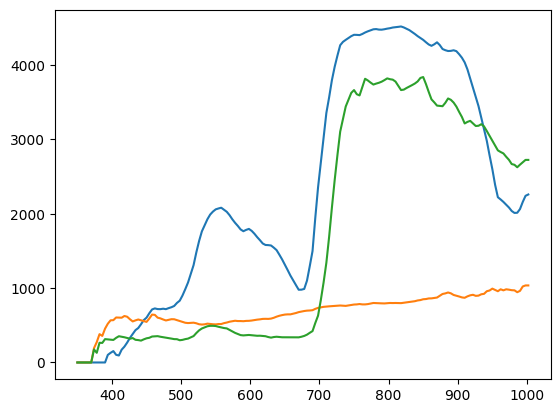

In [4]:
plt.figure()
plt.plot(waves, (use_spectra).T)
plt.show()

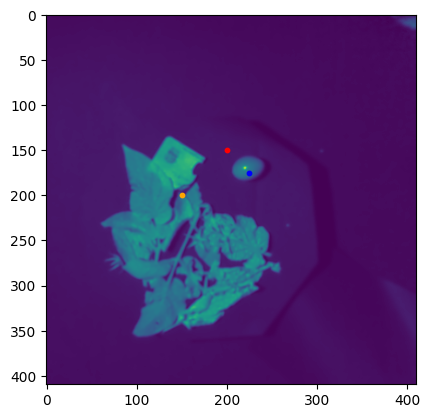

In [5]:
plt.figure()
plt.imshow(sample_cube[:,:,100])
plt.scatter(225, 175, s=10, c='b')
plt.scatter(200, 150, s=10, c='r')
plt.scatter(150, 200, s=10, c='orange')
plt.show()

In [6]:
spectra = sample_cube.reshape(410*410, 164) / 1000

In [7]:
node = Euclidean(use_spectra)

In [ ]:
node2 = Manhattan()

In [ ]:
node3 = Canberra()

In [ ]:
node4 = SpectralAngle()

In [ ]:
node5 = GFC()

In [ ]:
node6 = Minkowski(5)

In [ ]:
node7 = ECS(waves)

In [ ]:
# Create a graph here

In [ ]:
node5.forward(sample_cube/1000, use_spectra).shape

In [ ]:
plt.figure()
plt.imshow(np.argmin(node2.forward(sample_cube, use_spectra), axis=2))
plt.show()

In [ ]:
graph.add_base_node(node)

In [ ]:
# Stage 1 - Dimensionality Reduction
pca_stage = PCA(n_components=100)
pca_stage.fit(sample_cube)
out = pca_stage.forward(sample_cube)

In [ ]:
# Stage 2 - Dimensionality Reduction (Redundanct, but included for example)
pca_stage2 = PCA(n_components=10)
pca_stage2.fit(out)
out2 = pca_stage2.forward(out)

In [ ]:
# Stage 3 - Upsupervised classification
kmeans_stage = KMeans(n_clusters=4)
kmeans_stage.fit(out2)

In [ ]:
# Stage 4 - Upsupervised classification on higher dim data
kmeans_stage2 = KMeans(n_clusters=4)
kmeans_stage2.fit(out)

In [ ]:
graph.add_base_node(pca_stage)

In [ ]:
graph.add_edge(pca_stage, pca_stage2)

In [ ]:
graph.add_edge(pca_stage2, kmeans_stage)

In [ ]:
graph.add_edge(pca_stage, kmeans_stage2)

In [ ]:
out = graph.forward(sample_cube)

In [ ]:
out.shape

In [ ]:
nx.draw(graph.graph, with_labels = True)

In [ ]:
plt.figure()
plt.imshow(list(out.values())[-1], cmap='grey')
plt.show()

In [ ]:
plt.figure()
plt.imshow(list(out.values())[-2], cmap='grey')
plt.show()

In [ ]:
graph.serialize()

In [ ]:
node.__dict__

In [8]:
graphs_load = Graph('tomato_test_3')

In [9]:
graphs_load.load('/home/nathaniel/tomato_net_2024_05_06_02_02_34.zip')

{'edges': [], 'entry_point': 'Euclidean-a78e40fc-72ed-497f-84d3-ac6a769d1ff2', 'name': 'tomato_net', 'nodes': [{'id': 'Euclidean-a78e40fc-72ed-497f-84d3-ac6a769d1ff2', 'ref_spectra': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 102, 130, 153, 103, 94, 172, 213, 268, 331, 383, 435, 463, 514, 570, 603, 662, 713, 727, 718, 717, 723, 717, 731, 743, 760, 801, 831, 901, 986, 1076, 1192, 1309, 1481, 1634, 1763, 1844, 1926, 1989, 2029, 2059, 2071, 2081, 2053, 2026, 1981, 1926, 1878, 1836, 1789, 1765, 1783, 1796, 1770, 1731, 1685, 1644, 1600, 1580, 1578, 1573, 1544, 1511, 1450, 1386, 1316, 1243, 1169, 1104, 1041, 978, 979, 989, 1101, 1295, 1498, 1946, 2356, 2685, 3021, 3355, 3565, 3795, 3975, 4126, 4266, 4311, 4338, 4363, 4388, 4406, 4405, 4402, 4417, 4437, 4453, 4467, 4480, 4483, 4476, 4475, 4481, 4489, 4495, 4504, 4508, 4513, 4518, 4505, 4487, 4469, 4443, 4417, 4388, 4363, 4338, 4306, 4276, 4258, 4278, 4305, 4268, 4215, 4199, 4188, 4190, 4198, 4186, 4145, 4098, 4035, 3941, 3818, 3696, 3571, 3447, 3293,

In [ ]:
list(graphs_load.nodes.values())[0]

In [10]:
out2 = graphs_load.forward(sample_cube)

In [11]:
out2.shape

(410, 410, 3)

In [ ]:
plt.figure()
plt.imshow(list(out2.values())[-1], cmap='grey')
plt.show()

In [ ]:
plt.figure()
plt.imshow(list(out2.values())[-2], cmap='grey')
plt.show()